In [64]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.stats import linregress
import TISTNplot as tn

# Nodig voor latex rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

sample = 6
B = 0.333

#d = pd.read_excel('input/week 6 meting '+str(sample)+'.xlsx', columns=['I', 'I_spoel', 'U_H', 'U_H_offset', 'U_H_verschil', 'B'])
d = pd.read_excel('input/week 6 alles.xlsx', columns=['I', 'I_spoel', 'U_H', 'U_H_offset', 'U_H_verschil', 'B'])

a = pd.DataFrame()
a['I'] = d['I_plaat (A)']
a['U'] = d['U_H verschil'] #terug rekenen naar origineel in micro V

d = 5*10**-5
e = 1.602*10**-19
a['coefficient'] = a['U']*(d/B)

<IPython.core.display.Javascript object>


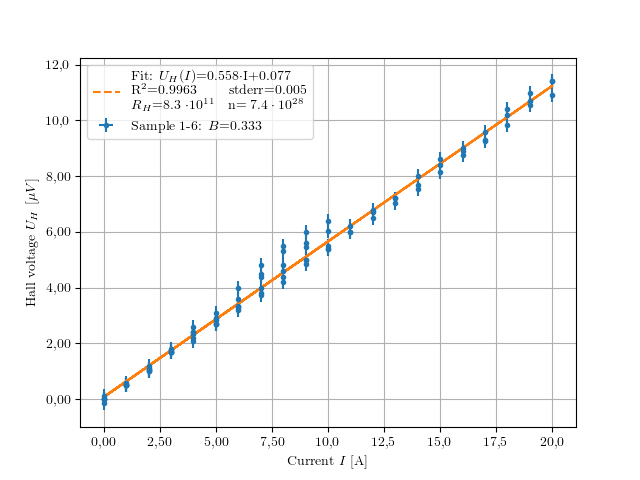

8.38140674206248
7.4


In [70]:
plt.close()
label_tekst = 'Sample 1-%s: $B$=%s' % (sample, B)
plt.errorbar(a['I'], a['U'], 0.25, 0.05, '.', label=label_tekst)

#fit plotten
fit = linregress(a['I'], a['U'])

R_H = fit[0]*10**-6*(d/B)*10**11
n = 1/(R_H*e)*10**28
n = str(n)[:3]
fit_label='Fit: $U_H$($I$)=%.3f\cdot $I$ +%.3f \quad \n R$^2$=%.4f \qquad $\mathrm{stderr}$=%.3f \n $R_H$=%.3s \cdot 10^{11} \quad $n$=' % (fit[0], fit[1], fit[2], fit[4], R_H)+n+'\cdot 10^{28}'
plt.plot(a['I'], fit[0]*a['I']+fit[1], '--', label=fit_label)

plt.legend()
plt.grid()
plt.xlabel('Current $I$ [A]')
plt.ylabel('Hall voltage $U_H$ \mathrm{[\mu V]}}')

#correcte opmaak
tn.PRECISION_X = 3
tn.PRECISION_Y = 3
tn.fix_axis(plt.gca())

fit
print(R_H)
print(n)
plt.savefig('output\\sample'+str(sample)+'.png', dpi=200)

In [66]:
linregress(a['I'], a['coefficient'])

LinregressResult(slope=8.38140674206248e-05, intercept=1.163533130746255e-05, rvalue=0.9963239599660489, pvalue=4.6668085896195985e-101, stderr=7.472750703529686e-07)